In [1]:
import torch
from transformers import pipeline
# 파이토치 2.7버전 에러 해결
import torch, torch._dynamo
torch._dynamo.config.disable = True        # 전역 OFF

In [5]:
pipe = pipeline(
    "image-text-to-text",
    model="google/gemma-3-4b-pt", # "google/gemma-3-12b-it", "google/gemma-3-27b-it" 
    device="cuda",
    torch_dtype="auto"
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda


In [6]:
pipe.model.dtype

torch.bfloat16

In [4]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/p-blog/candy.JPG"},
            {"type": "text", "text": "What animal is on the candy?"}
        ]
    }
]

In [5]:
output = pipe(text=messages, max_new_tokens=200)
print(output[0]["generated_text"][-1]["content"])

Let's take a closer look at the candy! 

Based on the image, the animal on the candy is a **turtle**. You can see the shell shape and the head and legs. 

Do you want to know anything else about these candies?


In [6]:
messages = [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."}]
        },
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Please remember this men."},
                {"type": "image", "image": "/purestorage/AILAB/AI_1/tyk/3_CUProjects/language_model/VLM/qwen25vl/query.jpg"},
                {"type": "text", "text": "Is the same men in the following image?"},
                {"type": "image", "image": "/purestorage/AILAB/AI_1/tyk/3_CUProjects/language_model/VLM/qwen25vl/key.png"},
                {"type": "text", "text": "Can you predict the bbox of the men?"},
            ]
        },

    ]


In [7]:
output = pipe(text=messages, max_new_tokens=200)
print(output[0]["generated_text"][-1]["content"])

Yes, the man in both images is indeed Tom Cruise.

Here's a prediction of the bounding box for Tom Cruise in the second image:

*   **x_min:** 350
*   **y_min:** 220
*   **x_max:** 750
*   **y_max:** 550

**Note:** This is an estimation based on the image and my analysis. Bounding box coordinates can vary slightly depending on the detection algorithm used.


In [9]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 50.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)


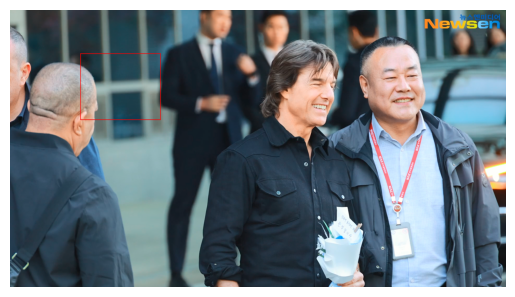

In [10]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 이미지 경로
image_path = "/purestorage/AILAB/AI_1/tyk/3_CUProjects/language_model/VLM/qwen25vl/key.png"

# 바운딩 박스 좌표
x_min = 350
y_min = 220
x_max = 750
y_max = 550

try:
    # 이미지 로드
    img = Image.open(image_path)

    # 이미지에 그리기 객체 생성
    draw = ImageDraw.Draw(img)

    # 바운딩 박스 그리기 (빨간색, 두께 3)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

    # Matplotlib을 사용하여 이미지 표시
    plt.imshow(img)
    plt.axis('off') # 축 숨기기
    plt.show()

except FileNotFoundError:
    print(f"오류: 이미지를 찾을 수 없습니다. 경로를 확인해주세요: {image_path}")

In [11]:
import scipy.io as sio
mat = sio.loadmat("/purestorage/AILAB/AI_4/byko/VLM/dataset/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/ground_truth/GT_IMG_1.mat")

In [12]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])


In [21]:
mat['image_info'][0][0][0][0][0]

array([[  95.17976351,  103.48510702],
       [ 297.43930549,  274.96602305],
       [ 350.20266427,  323.33243526],
       [ 468.92022152,  318.9354887 ],
       [ 410.29426733,   71.24083221],
       [ 366.32480168,   60.98129023],
       [ 552.46220626,   96.15686275],
       [ 589.10342763,  115.21029786],
       [ 666.78281694,  116.67594671],
       [ 615.48510702,   56.58434366],
       [ 647.72938183,   37.53090855],
       [ 606.69121389,   19.94312229],
       [ 571.51564137,   25.80571771],
       [ 791.36296962,  140.12632839],
       [ 791.36296962,  230.9965574 ],
       [ 858.78281694,  165.04235893],
       [ 917.40877114,  107.88205358],
       [ 828.00419099,   25.80571771],
       [ 797.22556504,   19.94312229],
       [ 769.37823679,   30.20266427],
       [ 956.98129023,    9.6835803 ],
       [ 998.01945816,   30.20266427],
       [1021.46983984,  143.0576261 ]])

In [24]:
type(pipe.processor)

transformers.models.gemma3.processing_gemma3.Gemma3Processor

In [25]:
pipe.processor.tokenizer.special_tokens_map["boi_token"]

'<start_of_image>'

In [27]:
pipe.processor.tokenizer.additional_special_tokens_ids

[]

In [28]:
pipe.processor.tokenizer.convert_tokens_to_ids('<start_of_image>')

255999

In [29]:
# pt 버전
pipe2 = pipeline(
    "image-text-to-text",
    model="google/gemma-3-4b-pt", # "google/gemma-3-12b-it", "google/gemma-3-27b-it" 
    device="cuda",
    torch_dtype="auto"
)

config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda


In [30]:
pipe2.processor.tokenizer.additional_special_tokens_ids

[]

In [31]:
pipe2.processor.tokenizer.vocab_size #  베이스 SentencePiece 어휘( id 0 – 262 143 )

262144

In [32]:
len(pipe2.processor.tokenizer) # vocab_size + added_tokens_encoder

262145

In [34]:
pipe2.processor.tokenizer.pad_token_id

0

In [36]:
pipe2.processor.tokenizer.convert_ids_to_tokens([262_144])

['<image_soft_token>']

In [ ]:
# 새 토큰 추가할 때 
#  tokenizer.add_tokens([...])
# model.resize_token_embeddings(len(tokenizer))

In [37]:
from datasets import load_dataset

In [38]:
train_dataset = load_dataset("ty-kim/license-detection", split="train")

In [40]:
train_dataset

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects', 'label_for_paligemma'],
    num_rows: 6176
})

In [41]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("google/gemma-3-4b-pt")

In [42]:
train_dataset[0]

{'image_id': 6152,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=472x303>,
 'width': 472,
 'height': 303,
 'objects': {'id': [6388],
  'area': [2604],
  'bbox': [[261.0, 203.0, 93.0, 28.0]],
  'category': [0]},
 'label_for_paligemma': '<loc0686><loc0566><loc0781><loc0768> plate'}

In [43]:
prompts = []

In [44]:
sample = train_dataset[0]

In [45]:
prompts.append(
                f"{processor.tokenizer.boi_token} detect \n\n{sample['label_for_paligemma']} {processor.tokenizer.eos_token}"
            )

In [46]:
prompts

['<start_of_image> detect \n\n<loc0686><loc0566><loc0781><loc0768> plate <eos>']

In [47]:
batch = processor(images=sample['image'], text=prompts, return_tensors="pt", padding=True)

In [48]:
batch

{'input_ids': tensor([[     2,    108, 255999, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         26214

In [50]:
labels = batch["input_ids"].clone()  

In [51]:
type(processor)

transformers.models.gemma3.processing_gemma3.Gemma3Processor

In [52]:
image_token_id = [
            processor.tokenizer.convert_tokens_to_ids(
                processor.tokenizer.special_tokens_map["boi_token"]
            )
        ]

In [53]:
image_token_id

[255999]

In [55]:
processor.tokenizer.special_tokens_map

{'bos_token': '<bos>',
 'eos_token': '<eos>',
 'unk_token': '<unk>',
 'pad_token': '<pad>',
 'boi_token': '<start_of_image>',
 'eoi_token': '<end_of_image>',
 'image_token': '<image_soft_token>'}

In [65]:
labels

tensor([[     2,    108, 255999, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262

In [56]:
labels[labels == processor.tokenizer.pad_token_id] = -100

In [64]:
processor.tokenizer.decode(262144)

'<image_soft_token>'

In [63]:
(labels == 262144).sum()

tensor(256)